In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Question 1

## (a)

![替代文字](https://drive.google.com/uc?id=14kn-LCxKecDpjcZyfNmYzPfSleIJa9mJ)



## (b) (c)

![替代文字](https://drive.google.com/uc?id=1eKSktP_sX4OdLpUaKl9dGznFUQOE7kP0)

### Step 1 load data

In [0]:
from __future__ import absolute_import
from __future__ import print_function
from future.standard_library import install_aliases
install_aliases()
import numpy as np
import os
import gzip
import struct
import array
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve
from scipy.special import logsumexp
from IPython.display import display, Math, Latex

In [0]:
def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def mnist():
    base_url = 'http://yann.lecun.com/exdb/mnist/'

    def parse_labels(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data = struct.unpack(">II", fh.read(8))
            return np.array(array.array("B", fh.read()), dtype=np.uint8)

    def parse_images(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
            return np.array(array.array("B", fh.read()), dtype=np.uint8).reshape(num_data, rows, cols)

    for filename in ['train-images-idx3-ubyte.gz',
                     'train-labels-idx1-ubyte.gz',
                     't10k-images-idx3-ubyte.gz',
                     't10k-labels-idx1-ubyte.gz']:
        download(base_url + filename, filename)

    train_images = parse_images('data/train-images-idx3-ubyte.gz')
    train_labels = parse_labels('data/train-labels-idx1-ubyte.gz')
    test_images = parse_images('data/t10k-images-idx3-ubyte.gz')
    test_labels = parse_labels('data/t10k-labels-idx1-ubyte.gz')

    return train_images, train_labels, test_images[:1000], test_labels[:1000]


def load_mnist():
    partial_flatten = lambda x: np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))
    one_hot = lambda x, k: np.array(x[:, None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels = mnist()
    train_images = (partial_flatten(train_images) / 255.0 > .5).astype(float)
    test_images = (partial_flatten(test_images) / 255.0 > .5).astype(float)
    train_labels = one_hot(train_labels, 10)
    test_labels = one_hot(test_labels, 10)
    N_data = train_images.shape[0]

    return N_data, train_images, train_labels, test_images, test_labels


def plot_images(images, ax, ims_per_row=5, padding=5, digit_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=None, vmax=None):
    """Images should be a (N_images x pixels) matrix."""
    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = np.min(images.ravel())
    concat_images = np.full(((digit_dimensions[0] + padding) * N_rows + padding,
                             (digit_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], digit_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + digit_dimensions[0]) * row_ix
        col_start = padding + (padding + digit_dimensions[1]) * col_ix
        concat_images[row_start: row_start + digit_dimensions[0],
                      col_start: col_start + digit_dimensions[1]] = cur_image
        cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    return cax


def save_images(images, filename, **kwargs):
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)
    plot_images(images, ax, **kwargs)
    fig.patch.set_visible(False)
    ax.patch.set_visible(False)
    plt.savefig(filename)

if __name__ == '__main__':
    N_data, train_images, train_labels, test_images, test_labels = load_mnist()
    print(N_data)
    print(train_images.shape)
    print(train_labels.shape)
    print(test_images.shape)
    print(test_labels.shape)

60000
(60000, 784)
(60000, 10)
(1000, 784)
(1000, 10)


### Step 2: According to question a, complete train_mle_estimator function

In [0]:
def train_mle_estimator(train_images, train_labels):
    """ Inputs: train_images, train_labels
        Returns the MLE estimators theta_mle and pi_mle"""
    N, D = train_images.shape
    theta_mle = np.zeros((10, D))
    pi_mle = np.zeros(10)

    for i in range(10):
      pi_mle[i] = sum(train_labels[:, i]) / N

    for c in range(10):
        for d in range(D):
            theta_mle[c][d] = (1 + (np.sum(np.where((train_images[:, d] == 1) & (train_labels[:, c] == 1),
                 1, 0))))/ (2 +(np.sum(train_labels[:, c])))
    

    return theta_mle, pi_mle

### Step3: Write log-likehood function according to the equation derived

In [0]:
def log_likelihood_with_loop(images, theta, pi, train_labels):
    N, D = images.shape
    log_like = np.zeros((N, 10))

    for i in range(N):
        for c in range(10):
            if train_labels[i][c] != 1:
                log_like[i][c] -= np.log(pi[c])
                for d in range(D):
                    log_like[i][c] -= images[i][d] * np.log(theta[c][d])
                    log_like[i][c] -= np.log(1 - theta[c][d]) * (1 - images[i][d])
    return log_like

### Problem 1: 
since there are so many layers of loop in this function, it would drastically slow down the running speed of the program. 

In [0]:
def log_likelihood(images, theta, pi, train_labels):
    """ Inputs: images, theta, pi
        Returns the matrix 'log_like' of loglikehoods over the input images where
    log_like[i,c] = log p (c |x^(i), theta, pi) using the estimators theta and pi.
    log_like is a matrix of num of images x num of classes
    Note that log likelihood is not only for c^(i), it is for all possible c's."""

    N = images.shape[0]
    C, D = theta.shape

    log_like = np.zeros((N, C))

    for i in range(N):
        bern = np.where(images[i] > 0.5, theta, 1- theta)
        temp = np.log(pi) +np.sum(np.log(bern), axis = 1)
        log_like[i] = temp - logsumexp(temp)
    return log_like

def average_log_likelihood(images, theta, pi, train_labels):
    log_like = log_likelihood(images, theta, pi, train_labels)
    average_log_like = np.average(log_like, axis = 0)
    return average_log_like

if __name__ == '__main__':
    N_data, train_images, train_labels, test_images, test_labels = load_mnist()
    theta_mle, pi_mle = train_mle_estimator(train_images, train_labels)
    avg_loglike_mle = average_log_likelihood(train_images, theta_mle, pi_mle, train_labels)
    print(avg_loglike_mle)

[-109.28662699 -181.68961943  -72.47438253  -72.9793892   -73.12914282
  -55.01175952  -94.88549624 -105.08574599  -59.50921323  -81.3683617 ]


Problem 2: Notice that if we don't handle the situation for log0, the system would report "RuntimeWarning: divide by zero encountered in log", and the result would be -inf. In this case, we should make some minor edit on the log-likelihood function to avoid the sitation of log0. 

## (d)
Now we plot the MLE estimator $\hat{\theta}$ as 10 separate greyscale images, one for each class.

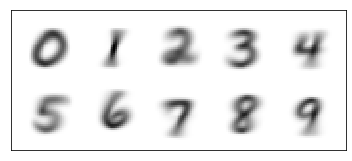

In [0]:
if __name__ == '__main__': 
  N_data, train_images, train_labels, test_images, test_labels = load_mnist()
  theta_mle, pi_mle = train_mle_estimator(train_images, train_labels)

  fig = plt.figure(1)
  fig.clf()
  ax = fig.add_subplot(111)
  plot_images(theta_mle, ax)

##（e)


![替代文字](https://drive.google.com/uc?id=1zIefOIde0z7aJ0iw_xbsjV4T3E7TI71e)

In [0]:
def train_map_estimator(train_images, train_labels):
    """ Inputs: train_images, train_labels
        Returns the MAP estimators theta_map and pi_map"""
    N, D = train_images.shape
    theta_mle = np.zeros((10, D))
    pi_mle = np.zeros(10)

    for i in range(10):
      pi_mle[i] = sum(train_labels[:, i]) / N

    for c in range(10):
        for d in range(D):
            theta_mle[c][d] = (1 + (np.sum(np.where((train_images[:, d] == 1) & (train_labels[:, c] == 1),
                 1, 0))))/ (2 + (np.sum(train_labels[:, c])))

    return theta_mle, pi_mle

##   (f)
Similar to question c, derive average log-likelihood per data point and and the accuracy on both the training and test set.

In [0]:
def predict(log_like):
    """ Inputs: matrix of log likelihoods
    Returns the predictions based on log likelihood values"""
    return np.argmax(log_like, axis=1)


def accuracy(log_like, labels):
    """ Inputs: matrix of log likelihoods and 1-of-K labels
    Returns the accuracy based on predictions from log likelihood values"""
    prediction = predict(log_like)
    return np.mean(prediction == np.argmax(labels, axis = 1))

if __name__ == '__main__':
    N_data, train_images, train_labels, test_images, test_labels = load_mnist()
    theta_map, pi_map = train_map_estimator(train_images, train_labels)
    loglike_train_map = log_likelihood(train_images, theta_map, pi_map, train_labels)
    avg_loglike_map = np.sum(loglike_train_map * train_labels) / N_data
    print("Average log-likelihood for MAP is ", avg_loglike_map)
    print("LOADED TRAIN LABEL ", train_labels.shape)
    train_accuracy_map = accuracy(loglike_train_map, train_labels)
    loglike_test_map = log_likelihood(test_images, theta_map, pi_map, test_labels)
    test_accuracy_map = accuracy(loglike_test_map, test_labels)

    print("Training accuracy for MAP is ", train_accuracy_map)
    print("Test accuracy for MAP is ", test_accuracy_map)

Average log-likelihood for MAP is  -3.3558565594023526
LOADED TRAIN LABEL  (60000, 10)
Training accuracy for MAP is  0.8357666666666667
Test accuracy for MAP is  0.816


## (g)

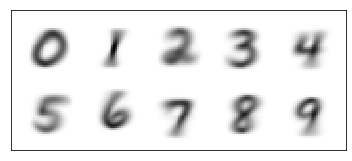

In [0]:
if __name__ == '__main__': 
  N_data, train_images, train_labels, test_images, test_labels = load_mnist()
  theta_map, pi_map = train_map_estimator(train_images, train_labels)

  fig = plt.figure(1)
  fig.clf()
  ax = fig.add_subplot(111)
  plot_images(theta_map, ax)

# Question 2

## (a) 
## True
###  Reason:
 Accoding to the Naïve Bayes model assumption, this statement is true.

## (b)
## False
### Reason: 
Because $p\left(x_{i}, x_{j}\right)=\sum_{c} p\left(x_{i}, x_{j} | c\right)=\sum_{c} p\left(x_{i} | c\right) p\left(x_{j} | c\right)$ and $p\left(x_{i}\right) p(x_{j})=\sum_{c} p\left(x_{i} | c\right) \sum_{c} p(x_{j} | c)$, we could state that $p\left(x_{i}, x_{j}\right) \neq p\left(x_{i}\right) p(x_{j})$. Therefore, the statement that any two pixels $x_i$ and $x_j$ where $i \neq j$ are
independent after marginalizing over c is False. 

## (c)

random c:  [6 2 3 0 6 4 1 3 9 7]


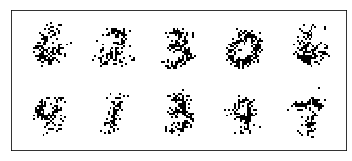

In [0]:
def image_sampler(theta, pi, num_images):
    """ Inputs: parameters theta and pi, and number of images to sample
    Returns the sampled images"""

    sampled_images = np.ndarray(shape = (10, 784))
    c = np.random.choice(10, 10, p=pi)
    print("random c: ", c)
    for i in range(num_images):
        sampled_images[i] = np.random.binomial(n=1, p=theta[c[i]])
    return sampled_images

if __name__ == '__main__':
    N_data, train_images, train_labels, test_images, test_labels = load_mnist()
    theta_map, pi_map = train_map_estimator(train_images, train_labels)
    sampled_images = image_sampler(theta_map, pi_map, 10)

    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)
    plot_images(sampled_images, ax)

# Question 3

## (a)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

(600, 256)
(400, 256)


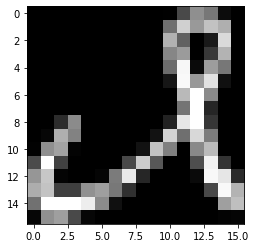

In [0]:
def load_data(filename, load2=True, load3=True):
  """Loads data for 2's and 3's
  Inputs:
    filename: Name of the file.
    load2: If True, load data for 2's.
    load3: If True, load data for 3's.
  """
  assert (load2 or load3), "Atleast one dataset must be loaded."
  data = np.load(filename)
  # print(data['train2'].shape)

  if load2 and load3:
    inputs_train = np.hstack((data['train2'], data['train3']))
    inputs_valid = np.hstack((data['valid2'], data['valid3']))
    inputs_test = np.hstack((data['test2'], data['test3']))
    target_train = np.hstack((np.zeros((1, data['train2'].shape[1])), np.ones((1, data['train3'].shape[1]))))
    target_valid = np.hstack((np.zeros((1, data['valid2'].shape[1])), np.ones((1, data['valid3'].shape[1]))))
    target_test = np.hstack((np.zeros((1, data['test2'].shape[1])), np.ones((1, data['test3'].shape[1]))))
  else:
    if load2:
      inputs_train = data['train2']
      target_train = np.zeros((1, data['train2'].shape[1]))
      inputs_valid = data['valid2']
      target_valid = np.zeros((1, data['valid2'].shape[1]))
      inputs_test = data['test2']
      target_test = np.zeros((1, data['test2'].shape[1]))
    else:
      inputs_train = data['train3']
      target_train = np.zeros((1, data['train3'].shape[1]))
      inputs_valid = data['valid3']
      target_valid = np.zeros((1, data['valid3'].shape[1]))
      inputs_test = data['test3']
      target_test = np.zeros((1, data['test3'].shape[1]))

  return inputs_train.T, inputs_valid.T, inputs_test.T, target_train.T, target_valid.T, target_test.T

if __name__ == '__main__':
    path = '/content/drive/My Drive/Colab Notebooks/digits.npz'
    inputs_train, inputs_valid, inputs_test, target_train, target_valid, target_test = load_data(path)
    a = np.reshape(inputs_train[0], (16, 16))
    plt.imshow(a, cmap = "gray")
    plt.show()

(600, 2)
WHEN K VALUE IS  2  THE CLASSIFICATION ERROR RATE IS  0.055
(600, 5)
WHEN K VALUE IS  5  THE CLASSIFICATION ERROR RATE IS  0.035
(600, 10)
WHEN K VALUE IS  10  THE CLASSIFICATION ERROR RATE IS  0.01
(600, 20)
WHEN K VALUE IS  20  THE CLASSIFICATION ERROR RATE IS  0.005
(600, 30)
WHEN K VALUE IS  30  THE CLASSIFICATION ERROR RATE IS  0.01


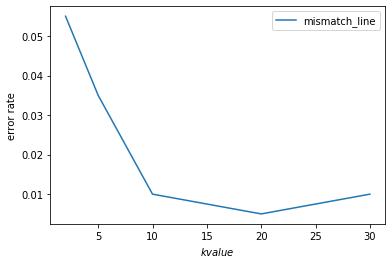

In [0]:
inputs_target = np.hstack((np.zeros((300)), np.ones((300))))
valid_target = np.hstack((np.zeros((100)), np.ones((100))))

knn = KNeighborsClassifier(n_neighbors=1)

inputs_train_mean = np.mean(inputs_train, axis=0)
inputs_train_centered = inputs_train - np.tile(inputs_train_mean, (inputs_train.shape[0], 1))
inputs_valid_centered = inputs_valid - np.tile(inputs_train_mean, (inputs_valid.shape[0], 1))

cov_matrix = np.cov(inputs_train_centered.T)
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)
k_list = [2, 5, 10, 20, 30]
mismatch_list = []

for item in k_list:
    eigen_matrix = eigen_vector[:, 0: item]
    inputs_train_recon = np.matmul(inputs_train_centered, eigen_matrix)
    inputs_valid_recon = np.matmul(inputs_valid_centered, eigen_matrix)
    knn.fit(inputs_train_recon, inputs_target)
    inputs_valid_target_pred = knn.predict(inputs_valid_recon)

    counter = 0
    for i in range(200):
        if inputs_valid_target_pred[i] != 0 and i <= 99:
            counter += 1
        elif inputs_valid_target_pred[i] != 1 and i >= 100:
            counter += 1
    mismatch_list.append(counter / 200)

    print("WHEN K VALUE IS ", item, " THE CLASSIFICATION ERROR RATE IS ", counter / 200)


plt.plot(k_list, mismatch_list, label="mismatch_line")
plt.legend(loc="upper right")
plt.xlabel(r"$k value$")
plt.ylabel("error rate")
plt.show()

## (b)
I would choose $K$ value at 20. Observe from the data above we notice that, when $K = 20$, the classification error reaches the lowerst point, which is $0.005$. When $K$ exceeds 20 the model would overfit, and it would learn some error into the system causing the classification rate rising. Therefore, I would choose model with $K$ value at 20. 

## (c)



WHEN K VALUE IS  2  THE CLASSIFICATION ERROR RATE IS  0.065
WHEN K VALUE IS  5  THE CLASSIFICATION ERROR RATE IS  0.04
WHEN K VALUE IS  10  THE CLASSIFICATION ERROR RATE IS  0.0125
WHEN K VALUE IS  20  THE CLASSIFICATION ERROR RATE IS  0.01
WHEN K VALUE IS  30  THE CLASSIFICATION ERROR RATE IS  0.0075


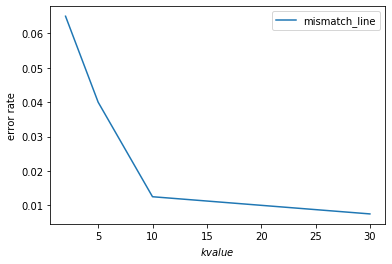

In [0]:
test_target = np.hstack((np.zeros((200)), np.ones((200))))


inputs_train_mean = np.mean(inputs_train, axis = 0)
inputs_train_centered = inputs_train - np.tile(inputs_train_mean, (inputs_train.shape[0], 1))
inputs_test_centered = inputs_test - np.tile(inputs_train_mean, (inputs_test.shape[0], 1))
cov_matrix = np.cov(inputs_train_centered.T)
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)

mismatch_list = []
for item in k_list:
    eigen_matrix = eigen_vector[:, 0: item]
    inputs_train_recon = np.matmul(inputs_train_centered, eigen_matrix)
    inputs_test_recon = np.matmul(inputs_test_centered, eigen_matrix)

    knn.fit(inputs_train_recon, inputs_target)
    inputs_test_target_pred = knn.predict(inputs_test_recon)

    counter = 0
    for i in range(400):
        if inputs_test_target_pred[i] != test_target[i]:
            counter += 1
    mismatch_list.append(counter / 400)
    print("WHEN K VALUE IS ", item, " THE CLASSIFICATION ERROR RATE IS ", counter / 400)


plt.plot(k_list, mismatch_list, label="mismatch_line")
plt.legend(loc="upper right")
plt.xlabel(r"$k value$")
plt.ylabel("error rate")
plt.show()

In this way, we choose $K = 30$, where the classification error rate is the lowest, at 0.0075